# Kaggle: IBM Attrition

## Uncover the factors that led to employee attrition and explore important questions such as:

1. Show a breakdown of distance from home by job role and attrition
2. Compare average monthly income by education and attrition

In [1]:
# Imports needed to complete the assignment
import pandas as pd
import numpy as np
import seaborn as sns

In [3]:
# load csv into pandas dataframe
attrition = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')
attrition

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


### Understand the dataset

In [4]:
attrition.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [5]:
attrition.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

In [7]:
attrition.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [8]:
#Find any null values
nan_df = attrition[attrition.isna().any(axis = 1)]
nan_df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager


# IBM attrition analysis 

## 1. Breakdown of distance from home by job role and attrition

In [32]:
#Breakdown the distance from home by job role and attrition
attrition['DistanceFromHome'].describe()

count    1470.000000
mean        9.192517
std         8.106864
min         1.000000
25%         2.000000
50%         7.000000
75%        14.000000
max        29.000000
Name: DistanceFromHome, dtype: float64

In [35]:
attrition['JobRole'].describe()

count                1470
unique                  9
top       Sales Executive
freq                  326
Name: JobRole, dtype: object

In [36]:
attrition['JobRole'].value_counts()

Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Manager                      102
Sales Representative          83
Research Director             80
Human Resources               52
Name: JobRole, dtype: int64

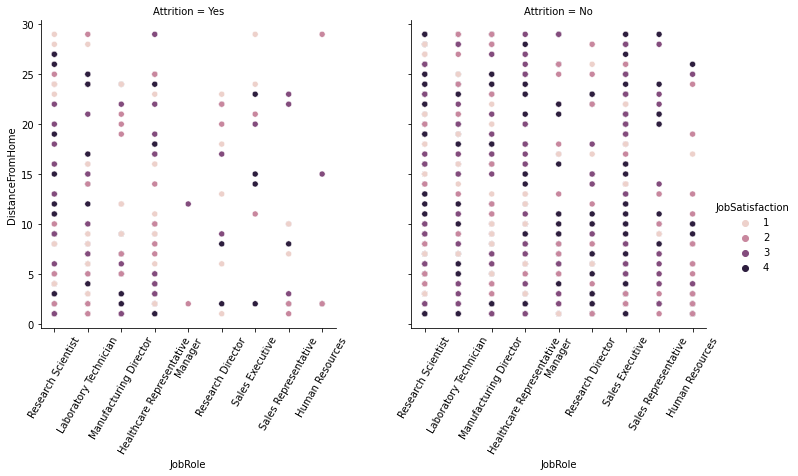

In [43]:
#Breakdown the distance from home by job role and attrition
ax = sns.relplot(x="JobRole", y="DistanceFromHome", hue="JobSatisfaction", data=attrition, col = "Attrition")
ax.set_xticklabels(rotation=60)

In [58]:
attrition[["DistanceFromHome","Attrition"]].groupby("Attrition").mean()

,DistanceFromHome
Attrition,
No,8.915653
Yes,10.632911


In [67]:
#Pivot table of Job role vs attrition
pivotRole = pd.crosstab(attrition['JobRole'], attrition['Attrition'], normalize = 'index')
pivotRole

Attrition,No,Yes
JobRole,,
Healthcare Representative,0.931298,0.068702
Human Resources,0.769231,0.230769
Laboratory Technician,0.760618,0.239382
Manager,0.950980,0.049020
Manufacturing Director,0.931034,0.068966
Research Director,0.975000,0.025000
Research Scientist,0.839041,0.160959
Sales Executive,0.825153,0.174847
Sales Representative,0.602410,0.397590


In [68]:
#Pivot table of Distance from home vs attrition
pivotDistance = pd.crosstab(attrition['DistanceFromHome'], attrition['Attrition'], normalize = 'index')
pivotDistance

Attrition,No,Yes
DistanceFromHome,,
1,0.875000,0.125000
2,0.867299,0.132701
3,0.833333,0.166667
4,0.859375,0.140625
5,0.846154,0.153846
6,0.881356,0.118644
7,0.869048,0.130952
8,0.875000,0.125000
9,0.788235,0.211765


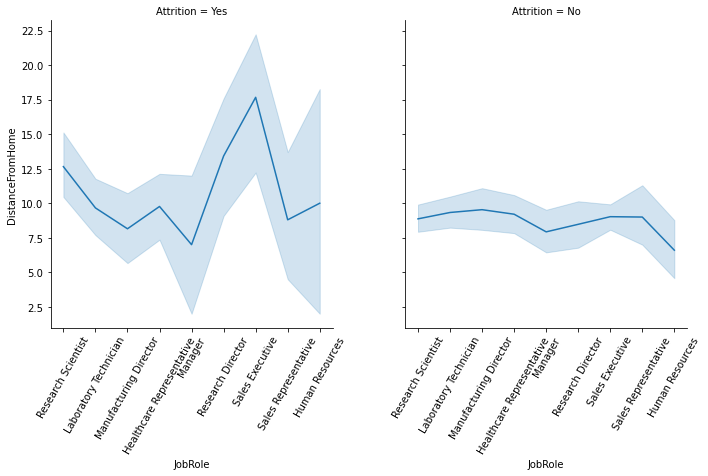

In [51]:
ax = sns.relplot(x="JobRole", y="DistanceFromHome", kind = "line", data=attrition, col = "Attrition")
ax.set_xticklabels(rotation=60)

### pivotRole shows that the roles with the highest attrition are Sales Representative (40%), Laboratory Technician (24%), Human Resources (23%), Sales Executive (18%) and Research Scientist (16%). Furthermore, the pivotDistance shows that the further the empoyee lives the more likely they are to resign from the job. Anything more than 9 kms translates to a bigger likelihood that they resign. Graphically comparing average distance from home with the job role and whether or not they resigned shows that the distance from home has a significant impact on whether or not someone leaves their job. Majority of the people who are still in their job live an average of 9 kms away from their job premises while those who left their jobs is 11 kms.

## 2. Comparing average monthly income with education and attrition

In [69]:
#Average monthly income vs attrition
attrition[["MonthlyIncome","Attrition"]].groupby("Attrition").mean()

,MonthlyIncome
Attrition,
No,6832.739659
Yes,4787.092827


In [86]:
# Education vs Job Role
pivotJob = pd.crosstab(attrition['Education'], attrition['JobRole'], normalize = 'index')
pivotJob

JobRole,Healthcare Representative,Human Resources,Laboratory Technician,Manager,Manufacturing Director,Research Director,Research Scientist,Sales Executive,Sales Representative
Education,,,,,,,,,
1,0.088235,0.029412,0.205882,0.052941,0.088235,0.041176,0.217647,0.158824,0.117647
2,0.074468,0.042553,0.202128,0.067376,0.117021,0.046099,0.163121,0.234043,0.053191
3,0.083916,0.038462,0.181818,0.069930,0.094406,0.052448,0.213287,0.209790,0.055944
4,0.110553,0.025126,0.145729,0.072864,0.095477,0.057789,0.198492,0.253769,0.040201
5,0.062500,0.062500,0.104167,0.104167,0.104167,0.145833,0.166667,0.250000,0.000000


In [85]:
# Education vs attrition
pivotEducation = pd.crosstab(attrition['Education'], attrition['Attrition'], normalize = 'index')
pivotEducation

Attrition,No,Yes
Education,,
1,0.817647,0.182353
2,0.843972,0.156028
3,0.826923,0.173077
4,0.854271,0.145729
5,0.895833,0.104167


In [82]:
# Education vs attrition vs Average monthly income
attrition.groupby(["Attrition", "Education"])["MonthlyIncome"].mean()

Attrition  Education
No         1            5926.129496
           2            6586.058824
           3            6882.919662
           4            7087.814706
           5            8559.906977
Yes        1            4360.161290
           2            4282.545455
           3            4770.242424
           4            5335.155172
           5            5850.200000
Name: MonthlyIncome, dtype: float64

### When you compare education, attrition and average income you notice that across all the education levels, the average income for the attrition (yes) is less than the average income for attrition (no). For example Education 1 had 4360 (attrition = yes) vs 5926 (attrition = no), Education 2 had 4282 vs 6586, Education 3 had 4770 vs 6883, Education 4 had 5335 vs 7088 and Education 5 had 5850 vs 8560. Additionally, the average income increases as you increase education level and attrition is highest in Education 1 which is the lowest paid. PivotJob shows us that Education 1 is mostly made up of Laboratory Technicians, Research Scientists and Sales Representatives. Furthermore, attrion is also prevalent amongst Education 3 which is mostly made up of Laboratory Technicians, Research Scientists and Sales Executives.

# 3. Other statistics

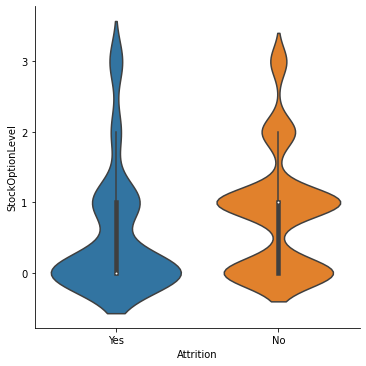

In [89]:
# Stockoption level vs attrition
sns.catplot(x="Attrition", y="StockOptionLevel", data=attrition, kind = "violin")

#### Employees who are not offered stock options do not have any investment in the success of the firm therefore they are less likely to stay when they get a better offer from another firm 

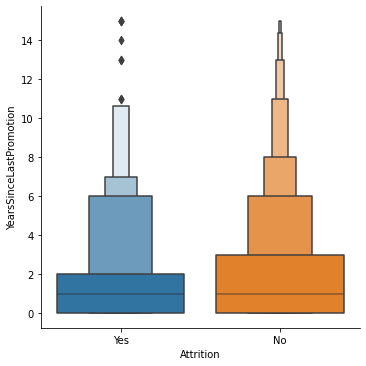

In [90]:
# Years since last promotion vs attrition
sns.catplot(x="Attrition", y="YearsSinceLastPromotion", data=attrition, kind="boxen")

#### It appears that the longer an employee stays without being promoted does not have a significant bearing on whether the stay at the job except for a few outliers.

In [102]:
# Performance rating vs Percentage Salary Hike vs attrition
growth = pd.crosstab(attrition['PercentSalaryHike'], [attrition['PerformanceRating'], attrition['Attrition']], normalize = True)
growth

PerformanceRating         3                   4          
Attrition                No       Yes        No       Yes
PercentSalaryHike                                        
11                 0.114966  0.027891  0.000000  0.000000
12                 0.112245  0.022449  0.000000  0.000000
13                 0.119048  0.023129  0.000000  0.000000
14                 0.120408  0.016327  0.000000  0.000000
15                 0.056463  0.012245  0.000000  0.000000
16                 0.043537  0.009524  0.000000  0.000000
17                 0.046259  0.009524  0.000000  0.000000
18                 0.051701  0.008844  0.000000  0.000000
19                 0.045578  0.006122  0.000000  0.000000
20                 0.000000  0.000000  0.032653  0.004762
21                 0.000000  0.000000  0.029252  0.003401
22                 0.000000  0.000000  0.029932  0.008163
23                 0.000000  0.000000  0.014966  0.004082
24                 0.000000  0.000000  0.010204  0.004082
25                 0.000000  0.000000  0.011565  0.000680

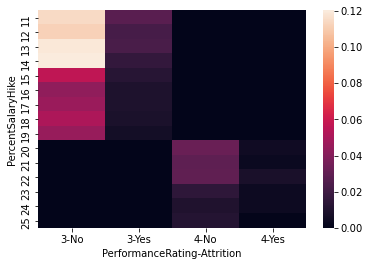

In [104]:
ax= sns.heatmap(growth)

#### The performance rating is positively correlated with the percentage salary hike and a lower the performance rating leads to a lower percentage salary hike which in turn leads to a higher probability of attrition

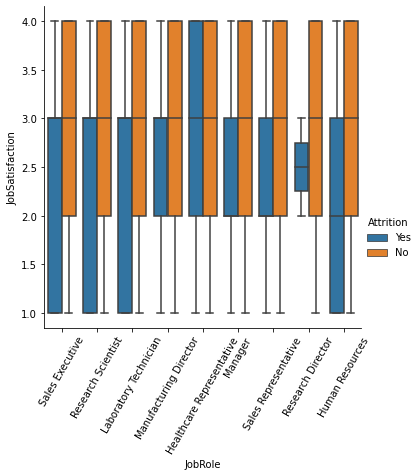

In [115]:
# Job Role vs Job satisfaction vs attrition
ax = sns.catplot(x="JobRole", y="JobSatisfaction", hue = "Attrition", kind = "box", data=attrition)
ax.set_xticklabels(rotation=60)

#### The most unstatisfied employees are the Sales executives, Research Scientists, Laboratory Technicians and Human Resources. These have the highest attrition rates. However, the Healthcare Representative Managers have high attrition rates despite being satisfied with their jobs. 